In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
# from matplotlib.colors import LogNorm

# import matplotlib.lines as mlines # needed for custom legend
# import matplotlib.font_manager as fm # needed to export editable text
# from scipy import stats
# import random

# needed for editable text in svg format
plt.rcParams['svg.fonttype'] = 'none'

from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script


# for binarization
from sklearn.preprocessing import binarize


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/figure_pics/'

#### load data
omc_bin = pd.read_pickle(in_path+"M194_M220_OMC_bin4.pkl")

#### load data
omc_countN = pd.read_pickle(in_path+"M194_M220_OMC_countN4.pkl")


##### load seperated data
# Load normalized count data - minimum intervention

omc_count_sep = pd.read_pickle(in_path + 'M194_M220_OMC_separate_count4.pkl')

omc_countN_sep = pd.read_pickle(in_path + 'M194_M220_OMC_separate_countN4.pkl')



# Data Processing

In [3]:
# initial processing
# bin processing
# omc_clean = [clean_up_data(df) for df in omc_bin]
# omc_type = [sort_by_celltype(df) for df in omc_clean]
# omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# # countN processing
# omc_cleanN = [clean_up_data(df) for df in omc_countN]
# omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
# omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



In [4]:
mm_count = 0
st_count = 0
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"]=="MMus":
        mm_count += omc_bin[i].shape[0]
    else:
        st_count += omc_bin[i].shape[0]

print("mmus total barcodes:", mm_count)
print("steg total barcodes:", st_count)

mmus total barcodes: 71704
steg total barcodes: 5114


In [5]:
# initial processing
# bin processing

# convert to bin

omc_bin_sep = [pd.DataFrame(binarize(df, threshold=4), columns=df.columns) for df in omc_count_sep]

# clean up data
drop = ["OB", "ACAi", "ACAc", "HIP"]
omc_clean_sep = [df.copy().drop(drop, axis=1) for df in omc_bin_sep]

it_areas = ['AOMCc', 'POMCc', 'AUD', 'STRd', 'STRv']
pt_areas = ['HY', 'AMY', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
omc_type_sep = [sort_by_celltype(df, it_areas=it_areas, pt_areas=pt_areas) for df in omc_clean_sep]
# omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median
omc_type_sep[0]


,AOMCi,POMCi,AOMCc,POMCc,AUD,STRd,STRv,TH,HY,AMY,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
11740,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
11741,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PT
11742,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PT


# isolate PAG neurons

In [6]:
# first, isolate PT cells
pt_type = [df[df['type']=="PT"] for df in omc_type_sep]

# then, get PAG+ neurons
pt_pag = []
for df in pt_type:
    df.loc[:,"pag_sum"] = df.loc[:,"APAGd"] + df.loc[:,"PPAGd"] + df.loc[:,"APAGv"] + df.loc[:,"PPAGv"]
    df_pag = df[df["pag_sum"]>0]
    pt_pag.append(df_pag)

mm_pag = []
st_pag = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"]=="MMus":
        mm_pag.append(pt_pag[i])
    else: # steg
        st_pag.append(pt_pag[i])

mm_pag = pd.concat(mm_pag).reset_index(drop=True)
st_pag = pd.concat(st_pag).reset_index(drop=True)

display(mm_pag)
display(st_pag)

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_44992/4209686951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"pag_sum"] = df.loc[:,"APAGd"] + df.loc[:,"PPAGd"] + df.loc[:,"APAGv"] + df.loc[:,"PPAGv"]
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_44992/4209686951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"pag_sum"] = df.loc[:,"APAGd"] + df.loc[:,"PPAGd"] + df.loc[:,"APAGv"] + df.loc[:,"PPAGv"]
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykern

,AOMCi,POMCi,AOMCc,POMCc,AUD,STRd,STRv,TH,HY,AMY,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,type,pag_sum
0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,PT,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,PT,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,PT,2.0
1408,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,PT,1.0
1409,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT,1.0
1410,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,PT,2.0


,AOMCi,POMCi,AOMCc,POMCc,AUD,STRd,STRv,TH,HY,AMY,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,type,pag_sum
0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,PT,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,PT,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,PT,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,PT,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,PT,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,PT,1.0
417,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,PT,2.0
418,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,PT,1.0
419,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,PT,2.0


# stacked bar chart

In [ ]:
print("Mouse", "\t", "species", "PAG Neurons")
print("----------------------------")
for i in range(metadata.shape[0]):
    print(metadata.loc[i,"mice"], "\t", metadata.loc[i,"species"], "\t", pt_pag[i].shape[0])

In [ ]:
plot_stack = pd.DataFrame(columns=["APAGd", "APAGv", "PPAGd", "PPAGv"], index=["MMus", "STeg"])

mm_sum = mm_pag_all.sum()
st_sum = st_pag_all.sum()

plot_stack.loc["MMus", :] = [mm_sum["APAGd"], mm_sum["APAGv"], mm_sum["PPAGd"], mm_sum["PPAGv"]]
plot_stack.loc["STeg", :] = [st_sum["APAGd"], st_sum["APAGv"], st_sum["PPAGd"], st_sum["PPAGv"]]
plot_stack_prop = plot_stack.copy()

plot_stack_prop.loc["MMus",:] = plot_stack_prop.loc["MMus",:]/mm_pag_all.shape[0]
plot_stack_prop.loc["STeg",:] = plot_stack_prop.loc["STeg",:]/st_pag_all.shape[0]
plot_stack_prop

In [ ]:

plot_stack_prop.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.rcParams.update({'font.size': 12})
fig = plt.gcf()
fig.set_size_inches((2,4))
plt.ylabel("PAG area proportion")
plt.title("PAG area proportions", size=20, pad=20)
plt.savefig(out_path+"PAG_areas_stacked.svg", dpi=300, bbox_inches="tight")
plt.show()

# Upsetplot

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:1092: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upset_plot(motif_prop[idx],  facecolor=color, ymax=ymax)
/Users/eisko/mambaforge/envs/MAPseq_231109/lib/python3.12/site-packages/upsetplot/plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['tab:orange' '#ff7f0e2e' '#ff7f0e2e' 'tab:orange' 'tab:orange'
 'tab:orange']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
/Users/eisko/mambaforge/envs/MAPseq_231109/lib/python3.12/site-packages/upsetplot/plotting.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future

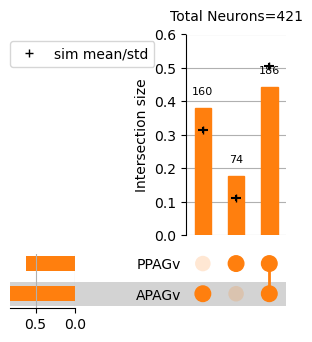

In [38]:
fancy_upsetplot(st_pag, plot_areas=[ "APAGv", "PPAGv"])
plt.savefig(out_path+"steg_pag_areas_upset.svg", dpi=300, bbox_inches="tight")

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:1092: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upset_plot(motif_prop[idx],  facecolor=color, ymax=ymax)
/Users/eisko/mambaforge/envs/MAPseq_231109/lib/python3.12/site-packages/upsetplot/plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['tab:blue' '#1f77b42e' '#1f77b42e' 'tab:blue' 'tab:blue' 'tab:blue']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
/Users/eisko/mambaforge/envs/MAPseq_231109/lib/python3.12/site-packages/upsetplot/plotting.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of

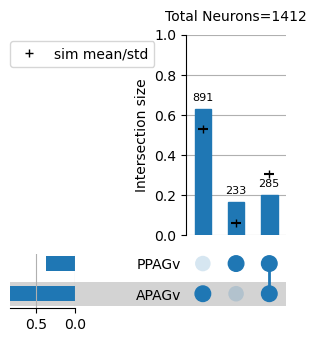

In [39]:
fancy_upsetplot(mm_pag, plot_areas=["APAGv", "PPAGv"], 
                color="tab:blue", # color same as tab:blue?
                ymax=1) 
plt.savefig(out_path+"mmus_pag_areas_upset.svg", dpi=300, bbox_inches="tight")


In [37]:
pag_areas = ["APAGd", "APAGv", "PPAGd", "PPAGv"]

st_rows = []
for i in range(len(pag_areas)):
    area = pag_areas[i]
    row = ["STeg", area, st_pag.sum()[area], st_pag.shape[0], st_pag.sum()[area]/st_pag.shape[0]]
    st_rows.append(row)

mm_rows = []
for i in range(len(pag_areas)):
    area = pag_areas[i]
    row = ["MMus", area, mm_pag.sum()[area], mm_pag.shape[0], mm_pag.sum()[area]/mm_pag.shape[0]]
    mm_rows.append(row)

pag_counts = pd.DataFrame(st_rows+mm_rows, 
                          columns=["species", "area", "count", "pag_total", "proportion"])
pag_counts

,species,area,count,pag_total,proportion
0,STeg,APAGd,23.0,421,0.054632
1,STeg,APAGv,346.0,421,0.821853
2,STeg,PPAGd,8.0,421,0.019002
3,STeg,PPAGv,260.0,421,0.617577
4,MMus,APAGd,8.0,1412,0.005666
5,MMus,APAGv,1176.0,1412,0.832861
6,MMus,PPAGd,5.0,1412,0.003541
7,MMus,PPAGv,518.0,1412,0.366856


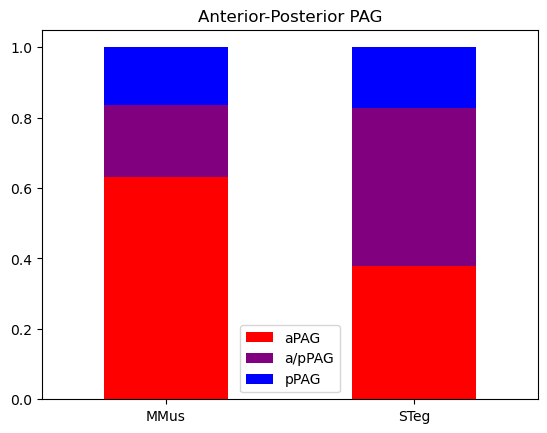

In [81]:

apag = st_pag[(st_pag["APAGd"]==1) | (st_pag["APAGv"]==1)]
ppag = st_pag[(st_pag["PPAGd"]==1) | (st_pag["PPAGv"]==1)]

appag = np.intersect1d(apag.index, ppag.index)

st_ap_pag = np.array([apag.shape[0]-appag.shape[0], appag.shape[0], ppag.shape[0]-appag.shape[0]])
st_ap_pag = st_ap_pag/st_pag.shape[0]


apag = mm_pag[(mm_pag["APAGd"]==1) | (mm_pag["APAGv"]==1)]
ppag = mm_pag[(mm_pag["PPAGd"]==1) | (mm_pag["PPAGv"]==1)]

appag = np.intersect1d(apag.index, ppag.index)

mm_ap_pag = np.array([apag.shape[0]-appag.shape[0], appag.shape[0], ppag.shape[0]-appag.shape[0]])
mm_ap_pag = mm_ap_pag/mm_pag.shape[0]

plot_df = pd.DataFrame(columns=["aPAG", "a/pPAG", "pPAG"], index=["MMus", "STeg"])
plot_df.loc["MMus",:] = mm_ap_pag
plot_df.loc["STeg",:] = st_ap_pag


# plot as stakced barchart
colors = ["red", "purple", "blue"]
plot_df.plot(kind='bar', stacked=True, color=colors)
plt.xticks(rotation=0, ha='center')
plt.title("Anterior-Posterior PAG")
plt.show()

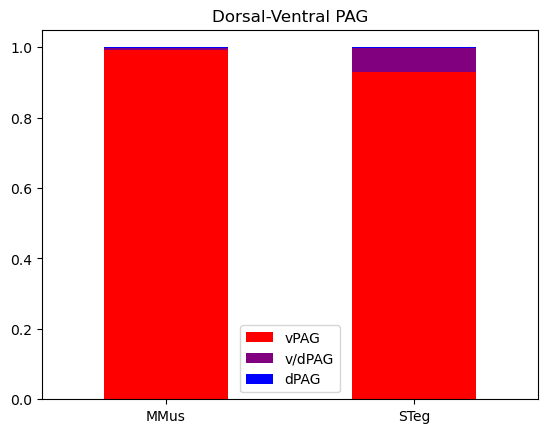

In [82]:

pagv = st_pag[(st_pag["APAGv"]==1) | (st_pag["PPAGv"]==1)]
pagd = st_pag[(st_pag["APAGd"]==1) | (st_pag["PPAGd"]==1)]

vdpag = np.intersect1d(pagv.index, pagd.index)

st_vd_pag = np.array([pagv.shape[0]-vdpag.shape[0], vdpag.shape[0], pagd.shape[0]-vdpag.shape[0]])
st_vd_pag = st_vd_pag/st_pag.shape[0]


pagv = mm_pag[(mm_pag["APAGv"]==1) | (mm_pag["PPAGv"]==1)]
pagd = mm_pag[(mm_pag["APAGd"]==1) | (mm_pag["PPAGd"]==1)]

vdpag = np.intersect1d(pagv.index, pagd.index)

mm_vd_pag = np.array([pagv.shape[0]-vdpag.shape[0], vdpag.shape[0], pagd.shape[0]-vdpag.shape[0]])
mm_vd_pag = mm_vd_pag/mm_pag.shape[0]

plot_df = pd.DataFrame(columns=["vPAG", "v/dPAG", "dPAG"], index=["MMus", "STeg"])
plot_df.loc["MMus",:] = mm_vd_pag
plot_df.loc["STeg",:] = st_vd_pag

colors = ["red", "purple", "blue"]
plot_df.plot(kind='bar', stacked=True, color=colors)
plt.xticks(rotation=0, ha='center')
plt.title("Dorsal-Ventral PAG")
plt.show()